# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


# 分布

<AxesSubplot:xlabel='x6'>

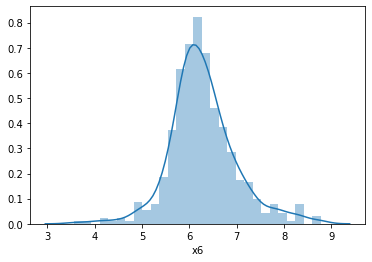

In [4]:
import seaborn as sns
sns.distplot(df['x6'])

# 外れ値除去（3σ法）

In [9]:
col='x6'

In [10]:

# 平均
mean = df.mean()
mean[col]

6.284634387351779

In [12]:
# 標準偏差（standart deviation）
sigma = df.std()
sigma[col]

0.7026171434153233

In [13]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105809

In [14]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597748

In [22]:
df2 = df[(df[col]>low) & (df[col]<high)]
df2

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
len(df)

506

In [23]:
len(df2)

498

<AxesSubplot:xlabel='x6'>

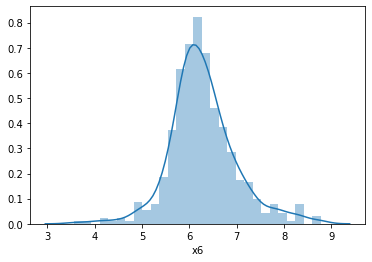

In [24]:
# 分布の確認
sns.distplot(df['x6'])

<AxesSubplot:xlabel='x6'>

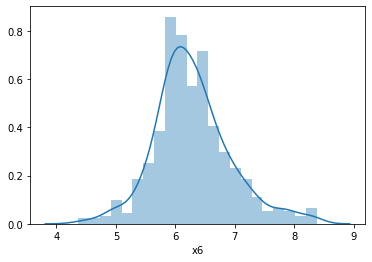

In [25]:
sns.distplot(df2['x6'])

In [26]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [29]:
_df = df
for col in cols : 
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [30]:
len(df)

506

In [31]:
len(_df)

415

# 入力変数と出力変数に分割

In [33]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [35]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# 重回帰分析

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# モデルの宣言
model = LinearRegression()
# モデルの学習
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# 検証 <- 訓練データ
model.score(X_train, y_train)

0.7972109224535133

In [41]:
model.score(X_test, y_test)

0.6253776004329594

# スケーリング

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# scalerの宣言
scalar = StandardScaler()
# scalerの学習
scalar.fit(X_train)

StandardScaler()

In [44]:
# scaling
X_train2 = scalar.transform(X_train)
X_test2 = scalar.transform(X_test)

In [45]:
# modelの宣言
model = LinearRegression()

In [46]:
# modelの学習
model.fit(X_train2, y_train)

LinearRegression()

In [47]:
# modelの検証
model.score(X_train2, y_train)

0.7972109224535133

In [48]:
# 検証
model.score(X_test2, y_test)

0.6253776004329598

In [49]:
# weight
model.coef_

array([-0.19542642,  0.21154333,  0.50827735,  0.        , -1.21336016,
        3.91986658, -0.36986122, -1.85711554,  1.16625182, -1.52855186,
       -1.8725663 ,  0.24442708, -2.76100147])

In [50]:
np.set_printoptions(precision=2, suppress=True)

<AxesSubplot:xlabel='x6'>

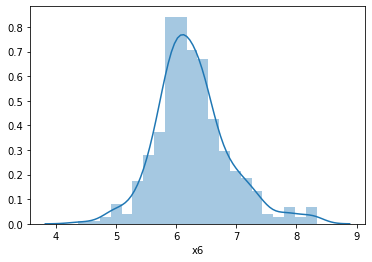

In [51]:
sns.distplot(_df['x6'])